In [122]:
# Import dependencies
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os
import numpy as np
import seaborn as sns

In [123]:
# Read city data from city_data.csv file
city_data = pd.read_csv('./Instructions/Pyber/raw_data/city_data.csv')
# cleans the city data by finding the duplicate city name and combining the rows with sum of driver counts
city_data = city_data.groupby('city').agg({'driver_count': sum, 'type':'first' }).reset_index()
city_data.set_index('city', inplace=True) # set index to City

# Read ride data from ride_data.csv file
ride_data = pd.read_csv('./Instructions/Pyber/raw_data/ride_data.csv')
ride_data.set_index('city', inplace=True) # set index to City

#combine the two data sets 
city_ride_stats = ride_data.join(city_data, how='left', on=None) 
city_ride_stats.head(5)

,date,fare,ride_id,driver_count,type
city,,,,,
Alvarezhaven,2016-04-18 20:51:29,31.93,4267015736324,21,Urban
Alvarezhaven,2016-08-01 00:39:48,6.42,8394540350728,21,Urban
Alvarezhaven,2016-09-01 22:57:12,18.09,1197329964911,21,Urban
Alvarezhaven,2016-08-18 07:12:06,20.74,357421158941,21,Urban
Alvarezhaven,2016-04-04 23:45:50,14.25,6431434271355,21,Urban


In [124]:
#group ride data per type and then city
data_perTC = city_ride_stats.groupby(['type', 'city'])

#average fare per city
avg_fare_unformatted = round(data_perTC['fare'].mean(),2)

#get each City Type data into its own dataframe Urban, Rural and Suburban
rural_df = pd.DataFrame(avg_fare_unformatted.Rural)
urban_df = pd.DataFrame(avg_fare_unformatted.Urban)
suburban_df = pd.DataFrame(avg_fare_unformatted.Suburban)


In [125]:
# Total Number of Rides Per City
trides_city = data_perTC["ride_id"].count()
#get Ride counts into respective City Type data frames
rural_df["Ride Count"] = trides_city.Rural
urban_df["Ride Count"] = trides_city.Urban
suburban_df["Ride Count"] = trides_city.Suburban


In [126]:
# Total Number of Drivers Per City
grouped_city = city_data.groupby('city')
# get Driver Counts per City into Respective City Type Data Frames
rural_df['Driver_count']= grouped_city['driver_count'].sum()
urban_df['Driver_count']= grouped_city['driver_count'].sum()
suburban_df['Driver_count'] = grouped_city['driver_count'].sum()

Bubble Plot that showcases the relationship between four key variables

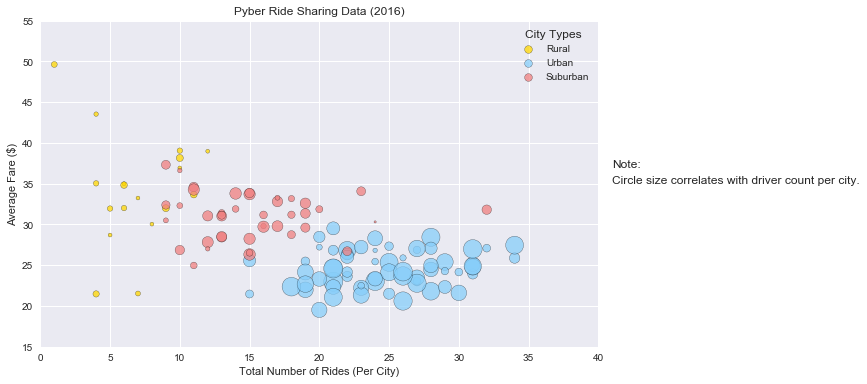

In [138]:
#set figure size for the plot
plt.figure(figsize=(10,6))
# sets the nice background for the plot
sns.set()

#Plot for Rural Data
rural_x = rural_df['Ride Count']
rural_y = rural_df['fare']
rural_z = rural_df['Driver_count']
rural = plt.scatter(rural_x,rural_y , s=rural_z*5, facecolor='gold', 
                    edgecolors="black", alpha=0.75, label = 'Rural')

#Plot for Urban Data
urban_x = urban_df['Ride Count']
urban_y = urban_df['fare']
urban_z = urban_df['Driver_count']
urban = plt.scatter(urban_x, urban_y , s=urban_z*5, facecolor='lightskyblue', 
                    edgecolors="black",alpha=0.75, label = 'Urban')

#Plot for Suburban Data
suburban_x = suburban_df['Ride Count']
suburban_y = suburban_df['fare']
suburban_z = suburban_df['Driver_count']
suburban = plt.scatter(suburban_x,suburban_y , s=suburban_z*5, facecolor='lightcoral', 
                       edgecolors="black",alpha=0.75, label = 'Suburban')

# Bubble plot with all three Plots in one Chart
lgnd = plt.legend(handles=[rural, urban, suburban], loc="best", title= 'City Types')
# Set Plot title
plt.title('Pyber Ride Sharing Data (2016)')
# Set X-axis and Y-axis Lables for the Plot
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
# Set X and Y axes limits
plt.xlim(0, 40)
plt.ylim(15, 55)
# Add notes to the plot, or 'Annotate' the plot
plt.text(41,37, 'Note:')
plt.text(41,35, 'Circle size correlates with driver count per city.')
# sets the size of the bubbles in the legend 
lgnd.legendHandles[0]._sizes = [60]
lgnd.legendHandles[1]._sizes = [60]
lgnd.legendHandles[2]._sizes = [60]

#Display the plot
plt.show()

 % of Total Fares by City Type

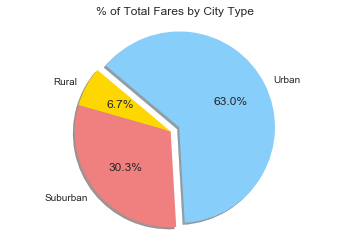

In [137]:
#Total Fare for all cities
total_perCity_fare = rpc_data['fare'].sum()
total_perCity_df = pd.DataFrame(total_city_fare)
total_fare = round(total_city_fare_df['fare'].sum(), 2)
# total fare per City Type
grouped_type = city_ride_stats.groupby('type')
fare_perType = round(grouped_type['fare'].sum(),2)
# % of Total Fares by City Type
pct_fare_type = round((fare_perType/total_fare)*100, 2)
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]
# The values of each section of the pie chart
sizes = [pct_fare_type[0], pct_fare_type[1], pct_fare_type[2]]
# The colors of each section of the pie chart
colors = ["gold", "lightcoral", "lightskyblue"]
# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.1)
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# pie chart axes are set to equal
plt.axis("equal")
#set the tile for pie chart
plt.title('% of Total Fares by City Type')
plt.show()

In [ ]:
# * % of Total Rides by City Type
# * % of Total Drivers by City Type